# Protein Membrane binding

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import quad
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.integrate as spi
import numpy as np
import pandas as pd


In [3]:
colors = ['#1F78B4', '#FF7F00', '#33A02C']

# Lysozyme

Binding percentage in Unmodified r1 is: 10.4%
Binding percentage in Unmodified r2 is: 17.4%
Binding percentage in Unmodified r3 is: 14.8%
Binding percentage in Unmodified r4 is: 17.0%
Binding percentage in PW r1 is: 9.0%
Binding percentage in PW r2 is: 5.7%
Binding percentage in PW r3 is: 9.8%
Binding percentage in PW r4 is: 9.2%
Binding percentage in PP r1 is: 13.2%
Binding percentage in PP r2 is: 15.6%
Binding percentage in PP r3 is: 13.0%
Binding percentage in PP r4 is: 15.6%


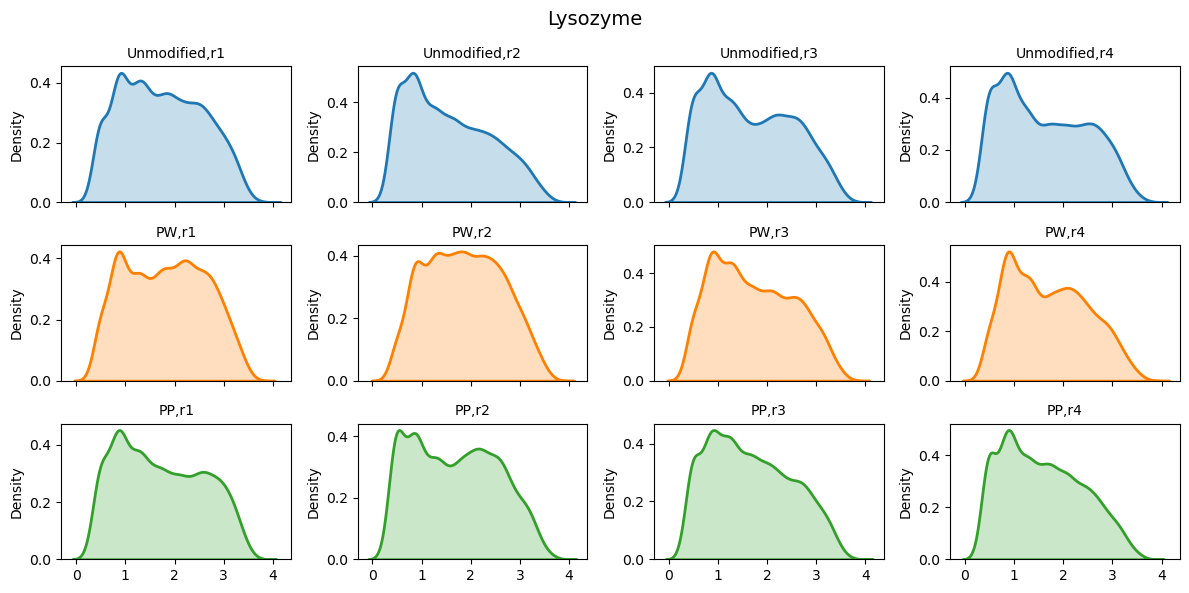

In [27]:
replica=[1,2,3,4]

lys = []
lys_m3pp = []
lys_m3pw = []

fig, axes = plt.subplots(3, len(replica), figsize=(12, 6), sharex=True)

for k in range(3):
    for n in range(len(replica)):
        i = replica[n]
        replica_label = 'r{}'.format(i)
        method_label = ''
        color = colors[k]
        
        if k == 0:
            dist_lys = np.genfromtxt('mindist/Lysozyme/Unmodified/rep%s/mindist_Lysozyme_Unmodified_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'Unmodified'
        elif k == 1:
            dist_lys = np.genfromtxt('mindist/Lysozyme/PW/rep%s/mindist_Lysozyme_PW_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PW'
        elif k == 2:
            dist_lys = np.genfromtxt('mindist/Lysozyme/PP/rep%s/mindist_Lysozyme_PP_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PP'
            
        kde_plot = sns.kdeplot(ax=axes[k,n], data = dist_lys.squeeze(), fill=True, linewidth=2.0, color = color)
        x, y = kde_plot.collections[0].get_paths()[0].vertices.T
        cutoff = 0.7  
        area = np.trapz(y[x <= cutoff], x[x <= cutoff])
        abs_area = np.abs(area)*100 
        print("Binding percentage in {} {} is: {:.1f}%".format(method_label, replica_label, abs_area))
        
        if k == 0:
            lys.append(abs_area)
        elif k == 1:
            lys_m3pw.append(abs_area)
        elif k == 2:
            lys_m3pp.append(abs_area)
        axes[k, n].set_title('{},{}'.format(method_label, replica_label), fontsize=10)

fig.suptitle('Lysozyme', fontsize=14)            
plt.tight_layout()

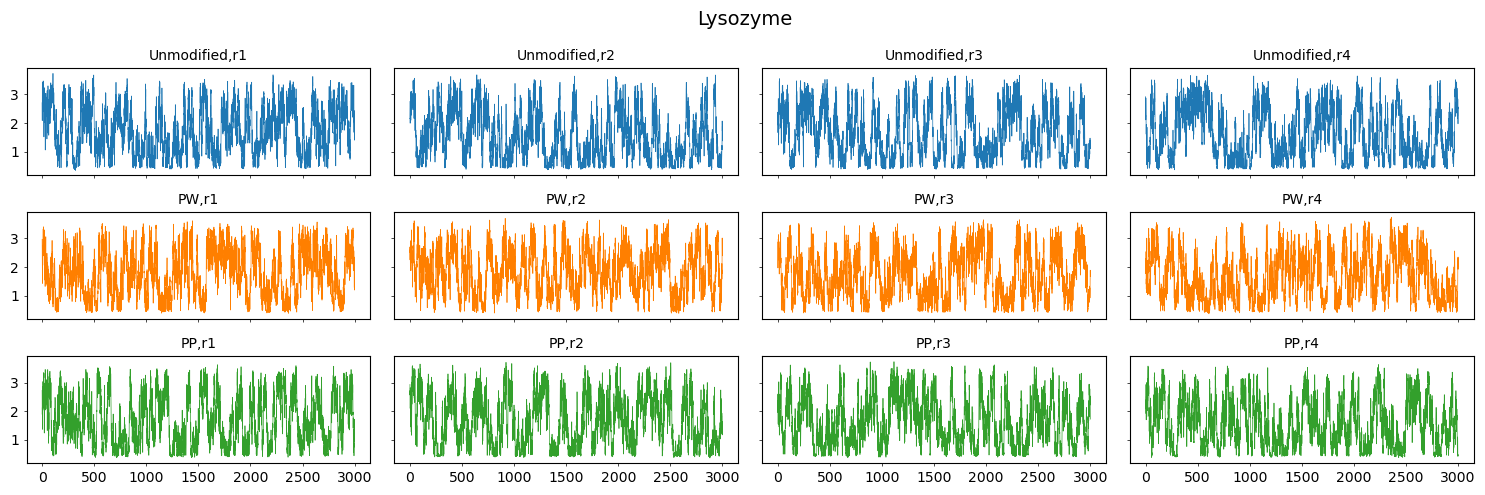

In [24]:
fig, axes = plt.subplots(3, len(replica), figsize=(15, 5), sharex=True, sharey=True)


time = [i * 0.5 for i in range(0, 6001)]

for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=10, width=0.5, length=2)
    ax.tick_params(axis='both', which='minor', labelsize=10, width=0.5, length=2)


for k in range(3):
    for n in range(len(replica)):
        i = replica[n]
        replica_label = 'r{}'.format(i)
        method_label = ''
        color = colors[k]
        
        if k == 0:
            dist = np.genfromtxt('mindist/Lysozyme/Unmodified/rep%s/mindist_Lysozyme_Unmodified_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'Unmodified'
        elif k == 1:
            dist = np.genfromtxt('mindist/Lysozyme/PW/rep%s/mindist_Lysozyme_PW_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PW'
        elif k == 2:
            dist = np.genfromtxt('mindist/Lysozyme/PP/rep%s/mindist_Lysozyme_PP_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PP'
            
        
        sns.lineplot(ax=axes[k,n], x=time, y=dist, linewidth=0.5, color=color, label=method_label, legend=False)
        axes[k, n].set_title('{},{}'.format(method_label, replica_label), fontsize=10)

fig.suptitle('Lysozyme', fontsize=14) 
plt.tight_layout()
fig.savefig('lys_mindist.pdf', bbox_inches = 'tight')

# Phospholipase 2

Binding percentage in Unmodified r1 is: 93.1%
Binding percentage in Unmodified r2 is: 79.8%
Binding percentage in Unmodified r3 is: 92.6%
Binding percentage in Unmodified r4 is: 18.3%
Binding percentage in PW r1 is: 10.5%
Binding percentage in PW r2 is: 10.0%
Binding percentage in PW r3 is: 13.3%
Binding percentage in PW r4 is: 8.0%
Binding percentage in PP r1 is: 58.2%
Binding percentage in PP r2 is: 85.2%
Binding percentage in PP r3 is: 19.0%
Binding percentage in PP r4 is: 68.4%


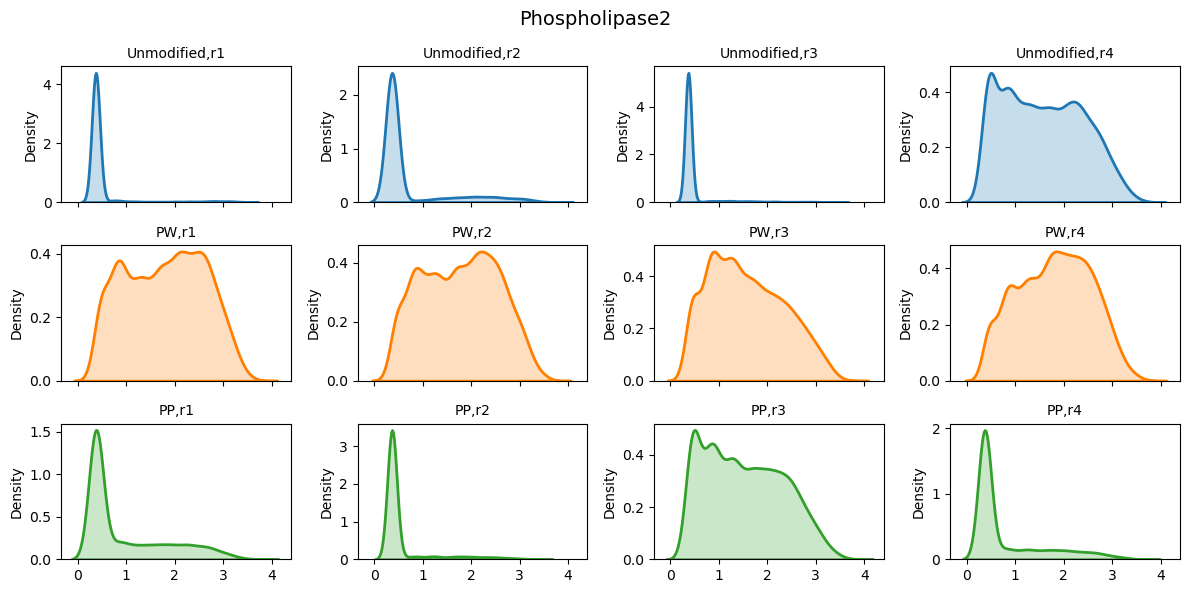

In [26]:
replica=[1,2,3,4]

pla = []
pla_m3pp = []
pla_m3pw = []

fig, axes = plt.subplots(3, len(replica), figsize=(12, 6), sharex=True)

for k in range(3):
    for n in range(len(replica)):
        i = replica[n]
        replica_label = 'r{}'.format(i)
        method_label = ''
        color = colors[k]
        
        if k == 0:
            dist_pla = np.genfromtxt('mindist/Phospholipase2/Unmodified/rep%s/mindist_Phospholipase2_Unmodified_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'Unmodified'
        elif k == 1:
            dist_pla = np.genfromtxt('mindist/Phospholipase2/PW/rep%s/mindist_Phospholipase2_PW_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PW'
        elif k == 2:
            dist_pla = np.genfromtxt('mindist/Phospholipase2/PP/rep%s/mindist_Phospholipase2_PP_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PP'
 
        kde_plot = sns.kdeplot(ax=axes[k,n], data = dist_pla.squeeze(), fill=True, linewidth=2.0, color = color)
        x, y = kde_plot.collections[0].get_paths()[0].vertices.T
        cutoff = 0.7  
        area = np.trapz(y[x <= cutoff], x[x <= cutoff])
        abs_area = np.abs(area)*100 
        print("Binding percentage in {} {} is: {:.1f}%".format(method_label, replica_label, abs_area))
        
        if k == 0:
            pla.append(abs_area)
        elif k == 1:
            pla_m3pw.append(abs_area)
        elif k == 2:
            pla_m3pp.append(abs_area)
        axes[k, n].set_title('{},{}'.format(method_label, replica_label), fontsize=10)
        

fig.suptitle('Phospholipase2', fontsize=14)             
plt.tight_layout()

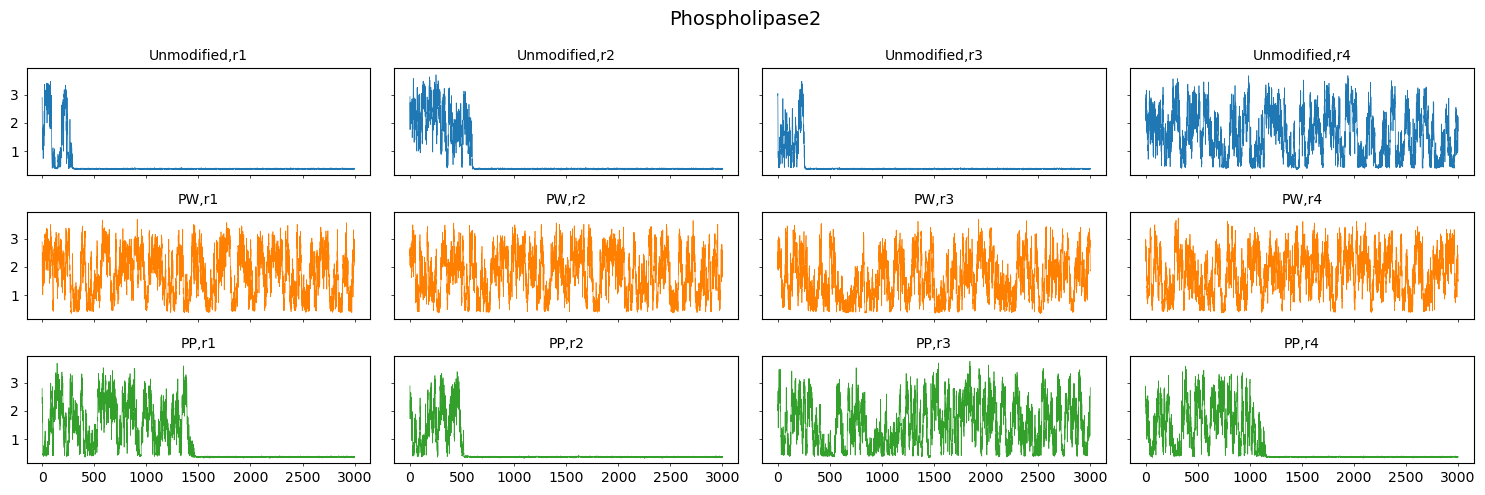

In [28]:
fig, axes = plt.subplots(3, len(replica), figsize=(15, 5), sharex=True, sharey=True)


time = [i * 0.5 for i in range(0, 6001)]

for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=10, width=0.5, length=2)
    ax.tick_params(axis='both', which='minor', labelsize=10, width=0.5, length=2)


for k in range(3):
    for n in range(len(replica)):
        i = replica[n]
        replica_label = 'r{}'.format(i)
        method_label = ''
        color = colors[k]
        
        if k == 0:
            dist = np.genfromtxt('mindist/Phospholipase2/Unmodified/rep%s/mindist_Phospholipase2_Unmodified_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'Unmodified'
        elif k == 1:
            dist = np.genfromtxt('mindist/Phospholipase2/PW/rep%s/mindist_Phospholipase2_PW_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PW'
        elif k == 2:
            dist = np.genfromtxt('mindist/Phospholipase2/PP/rep%s/mindist_Phospholipase2_PP_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PP'
            
        sns.lineplot(ax=axes[k,n], x=time, y=dist, linewidth=0.5, color=color, label=method_label, legend=False)
        axes[k, n].set_title('{},{}'.format(method_label, replica_label), fontsize=10)


fig.suptitle('Phospholipase2', fontsize=14)
plt.tight_layout()
fig.savefig('pla_mindist.pdf', bbox_inches = 'tight')

# Arf1 - GTP bound

Binding percentage in Unmodified r1 is: 92.8%
Binding percentage in Unmodified r2 is: 89.9%
Binding percentage in Unmodified r3 is: 70.1%
Binding percentage in Unmodified r4 is: 49.8%
Binding percentage in PW r1 is: 12.8%
Binding percentage in PW r2 is: 10.7%
Binding percentage in PW r3 is: 17.2%
Binding percentage in PW r4 is: 8.7%
Binding percentage in PP r1 is: 77.7%
Binding percentage in PP r2 is: 88.8%
Binding percentage in PP r3 is: 98.6%
Binding percentage in PP r4 is: 96.3%


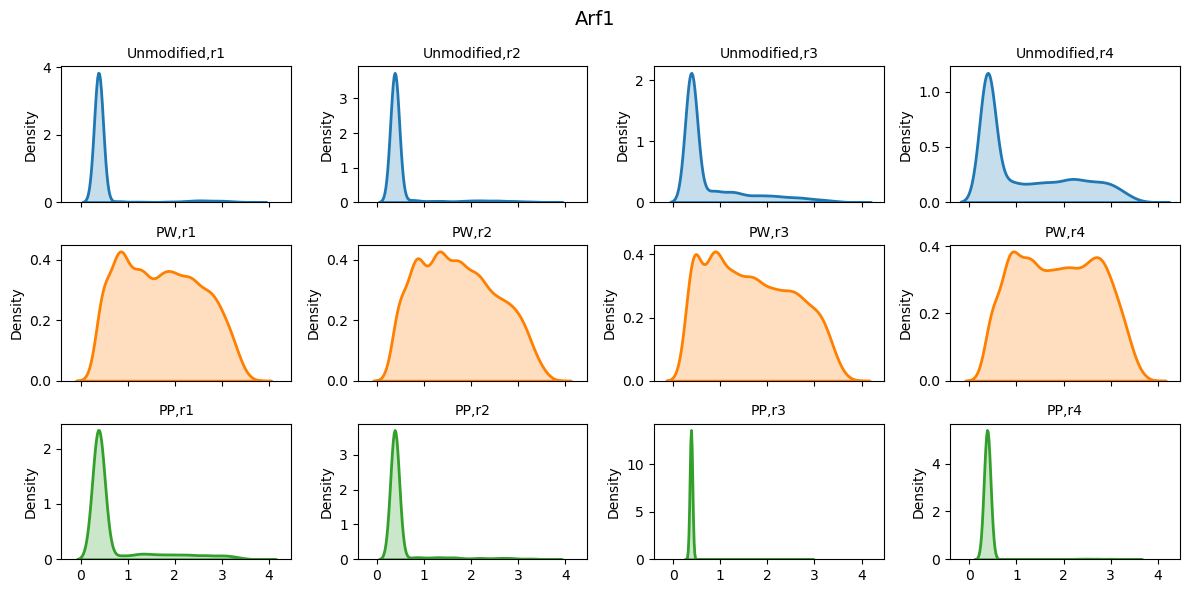

In [29]:
replica=[1,2,3,4]

arf = []
arf_m3pp = []
arf_m3pw = []

fig, axes = plt.subplots(3, len(replica), figsize=(12, 6), sharex=True)

for k in range(3):
    for n in range(len(replica)):
        i = replica[n]
        replica_label = 'r{}'.format(i)
        method_label = ''
        color = colors[k]
        
        if k == 0:
            dist_arf = np.genfromtxt('mindist/Arf1/Unmodified/rep%s/mindist_Arf1_Unmodified_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'Unmodified'
        elif k == 1:
            dist_arf = np.genfromtxt('mindist/Arf1/PW/rep%s/mindist_Arf1_PW_rep%s_column2.csv' % (str(i), str(i)),  unpack=True)
            method_label = 'PW'
        elif k == 2:
            dist_arf = np.genfromtxt('mindist/Arf1/PP/rep%s/mindist_Arf1_PP_rep%s_column2.csv' % (str(i), str(i)),  unpack=True)
            method_label = 'PP'
            
        kde_plot = sns.kdeplot(ax=axes[k,n], data = dist_arf.squeeze(), fill=True, linewidth=2.0, color = color)
        x, y = kde_plot.collections[0].get_paths()[0].vertices.T
        cutoff = 0.7  
        area = np.trapz(y[x <= cutoff], x[x <= cutoff])
        abs_area = np.abs(area)*100 
        print("Binding percentage in {} {} is: {:.1f}%".format(method_label, replica_label, abs_area))
        
        if k == 0:
            arf.append(abs_area)
        elif k == 1:
            arf_m3pw.append(abs_area)
        elif k == 2:
            arf_m3pp.append(abs_area)
        axes[k, n].set_title('{},{}'.format(method_label, replica_label), fontsize=10)
        
fig.suptitle('Arf1', fontsize=14)            
plt.tight_layout()

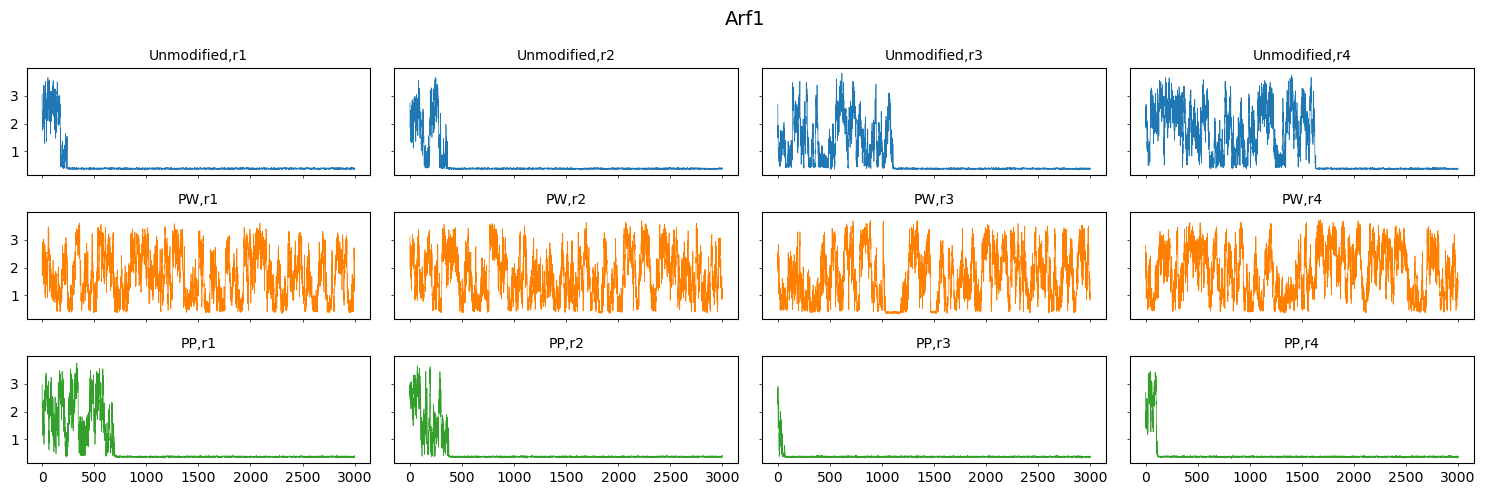

In [30]:
fig, axes = plt.subplots(3, len(replica), figsize=(15, 5), sharex=True, sharey=True)


time = [i * 0.5 for i in range(0, 6001)]

for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=10, width=0.5, length=2)
    ax.tick_params(axis='both', which='minor', labelsize=10, width=0.5, length=2)


for k in range(3):
    for n in range(len(replica)):
        i = replica[n]
        replica_label = 'r{}'.format(i)
        method_label = ''
        color = colors[k]
        
        if k == 0:
            dist = np.genfromtxt('mindist/Arf1/Unmodified/rep%s/mindist_Arf1_Unmodified_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'Unmodified'
        elif k == 1:
            dist = np.genfromtxt('mindist/Arf1/PW/rep%s/mindist_Arf1_PW_rep%s_column2.csv' % (str(i), str(i)),  unpack=True)
            method_label = 'PW'
        elif k == 2:
            dist = np.genfromtxt('mindist/Arf1/PP/rep%s/mindist_Arf1_PP_rep%s_column2.csv' % (str(i), str(i)),  unpack=True)
            method_label = 'PP'
            
        
        sns.lineplot(ax=axes[k,n], x=time, y=dist, linewidth=0.5, color=color, label=method_label, legend=False)
        axes[k, n].set_title('{},{}'.format(method_label, replica_label), fontsize=10)

fig.suptitle('Arf1', fontsize=14)
plt.tight_layout()
fig.savefig('arf1_mindist.pdf', bbox_inches = 'tight')

# Lactahedrin C2

Binding percentage in Unmodified r1 is: 74.1%
Binding percentage in Unmodified r2 is: 80.9%
Binding percentage in Unmodified r3 is: 42.0%
Binding percentage in Unmodified r4 is: 88.5%
Binding percentage in PW r1 is: 15.6%
Binding percentage in PW r2 is: 11.6%
Binding percentage in PW r3 is: 14.8%
Binding percentage in PW r4 is: 16.4%
Binding percentage in PP r1 is: 91.9%
Binding percentage in PP r2 is: 75.4%
Binding percentage in PP r3 is: 89.1%
Binding percentage in PP r4 is: 76.6%


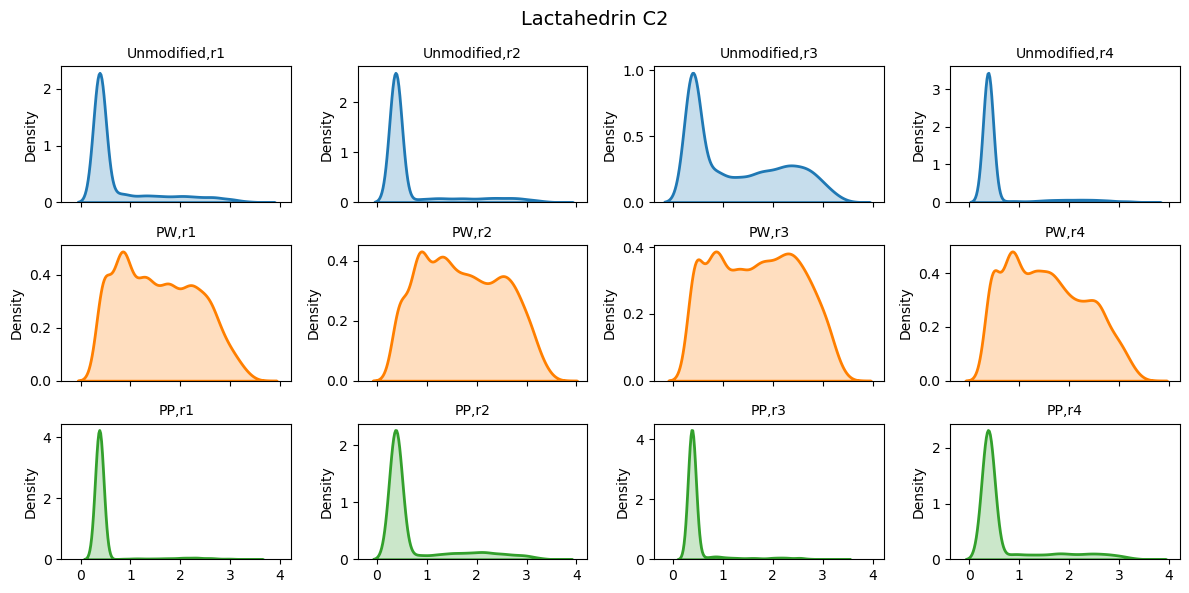

In [32]:
replica=[1,2,3,4]

lact = []
lact_m3pp = []
lact_m3pw = []

fig, axes = plt.subplots(3, len(replica), figsize=(12, 6), sharex=True)

for k in range(3):
    for n in range(len(replica)):
        i = replica[n]
        replica_label = 'r{}'.format(i)
        method_label = ''
        color = colors[k]
        
        if k == 0:
            dist_lact = np.genfromtxt('mindist/Lact_C2/Unmodified/rep%s/mindist_Lact_C2_Unmodified_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'Unmodified'
        elif k == 1:
            dist_lact = np.genfromtxt('mindist/Lact_C2/PW/rep%s/mindist_Lact_C2_PW_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PW'
        elif k == 2:
            dist_lact = np.genfromtxt('mindist/Lact_C2/PP/rep%s/mindist_Lact_C2_PP_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PP'
              
        kde_plot = sns.kdeplot(ax=axes[k,n], data = dist_lact.squeeze(), fill=True, linewidth=2.0, color = color)
        x, y = kde_plot.collections[0].get_paths()[0].vertices.T
        cutoff = 0.7  
        area = np.trapz(y[x <= cutoff], x[x <= cutoff])
        abs_area = np.abs(area)*100 
        print("Binding percentage in {} {} is: {:.1f}%".format(method_label, replica_label, abs_area))
        
        if k == 0:
            lact.append(abs_area)
        elif k == 1:
            lact_m3pw.append(abs_area)
        elif k == 2:
            lact_m3pp.append(abs_area)
        axes[k, n].set_title('{},{}'.format(method_label, replica_label), fontsize=10)
        
fig.suptitle('Lactahedrin C2', fontsize=14)
plt.tight_layout()

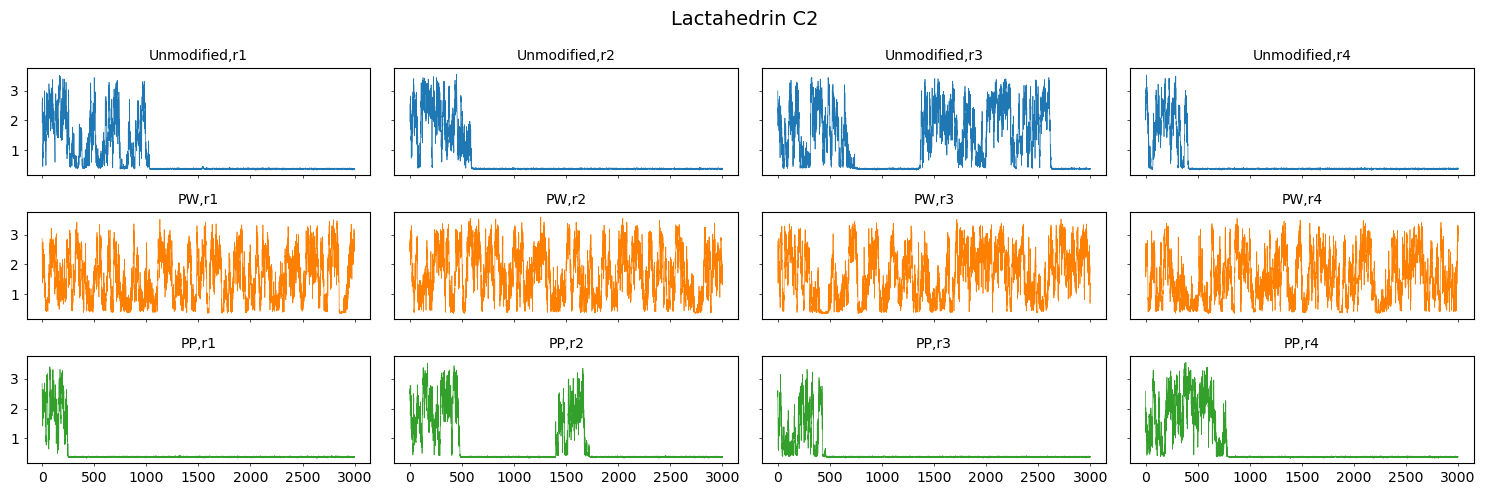

In [33]:
fig, axes = plt.subplots(3, len(replica), figsize=(15, 5), sharex=True, sharey=True)


time = [i * 0.5 for i in range(0, 6001)]

for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=10, width=0.5, length=2)
    ax.tick_params(axis='both', which='minor', labelsize=10, width=0.5, length=2)


for k in range(3):
    for n in range(len(replica)):
        i = replica[n]
        replica_label = 'r{}'.format(i)
        method_label = ''
        color = colors[k]
        
        if k == 0:
            dist = np.genfromtxt('mindist/Lact_C2/Unmodified/rep%s/mindist_Lact_C2_Unmodified_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'Unmodified'
        elif k == 1:
            dist = np.genfromtxt('mindist/Lact_C2/PW/rep%s/mindist_Lact_C2_PW_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PW'
        elif k == 2:
            dist = np.genfromtxt('mindist/Lact_C2/PP/rep%s/mindist_Lact_C2_PP_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PP'
            
        
        sns.lineplot(ax=axes[k,n], x=time, y=dist, linewidth=0.5, color=color, label=method_label, legend=False)
        axes[k, n].set_title('{},{}'.format(method_label, replica_label), fontsize=10)
        
fig.suptitle('Lactahedrin C2', fontsize=14)
plt.tight_layout()
fig.savefig('lact_mindist.pdf', bbox_inches = 'tight')

# PTEN (1-351)

Binding percentage in Unmodified r1 is: 26.7%
Binding percentage in Unmodified r2 is: 13.0%
Binding percentage in Unmodified r3 is: 94.0%
Binding percentage in Unmodified r4 is: 30.4%
Binding percentage in PW r1 is: 15.2%
Binding percentage in PW r2 is: 10.1%
Binding percentage in PW r3 is: 8.5%
Binding percentage in PW r4 is: 8.7%
Binding percentage in PP r1 is: 37.2%
Binding percentage in PP r2 is: 33.2%
Binding percentage in PP r3 is: 52.5%
Binding percentage in PP r4 is: 24.8%


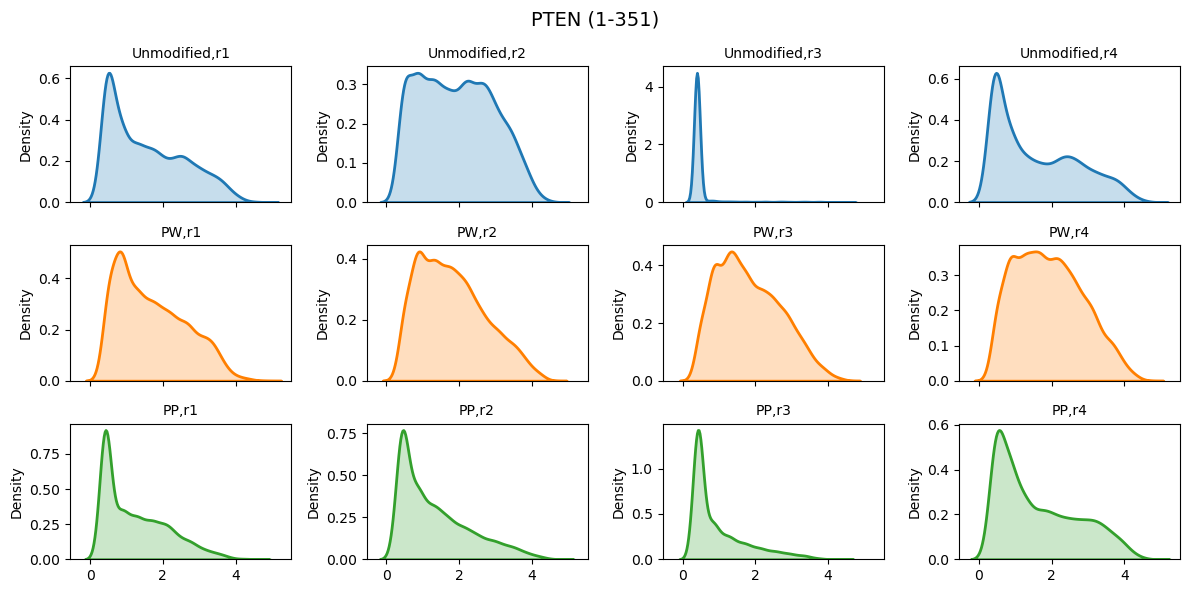

In [36]:
replica=[1,2,3,4]

pten1to351 = []
pten1to351_m3pp = []
pten1to351_m3pw = []

fig, axes = plt.subplots(3, len(replica), figsize=(12, 6), sharex=True)

for k in range(3):
    for n in range(len(replica)):
        i = replica[n]
        replica_label = 'r{}'.format(i)
        method_label = ''
        color = colors[k]
        if k == 0:
            dist_pten1to351 = np.genfromtxt('mindist/PTEN/Unmodified/rep%s/mindist_PTEN_Unmodified_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'Unmodified'
        elif k == 1:
            dist_pten1to351 = np.genfromtxt('mindist/PTEN/PW/rep%s/mindist_PTEN_PW_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PW'
        elif k == 2:
            dist_pten1to351 = np.genfromtxt('mindist/PTEN/PP/rep%s/mindist_PTEN_PP_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PP'
            
        kde_plot = sns.kdeplot(ax=axes[k,n], data = dist_pten1to351.squeeze(), fill=True, linewidth=2.0, color = color)
        x, y = kde_plot.collections[0].get_paths()[0].vertices.T
        cutoff = 0.7  
        area = np.trapz(y[x <= cutoff], x[x <= cutoff])
        abs_area = np.abs(area)*100 
        print("Binding percentage in {} {} is: {:.1f}%".format(method_label, replica_label, abs_area))
        
        if k == 0:
            pten1to351.append(abs_area)
        elif k == 1:
            pten1to351_m3pw.append(abs_area)
        elif k == 2:
            pten1to351_m3pp.append(abs_area)
        axes[k, n].set_title('{},{}'.format(method_label, replica_label), fontsize=10)
            
fig.suptitle('PTEN (1-351)', fontsize=14)  
plt.tight_layout()

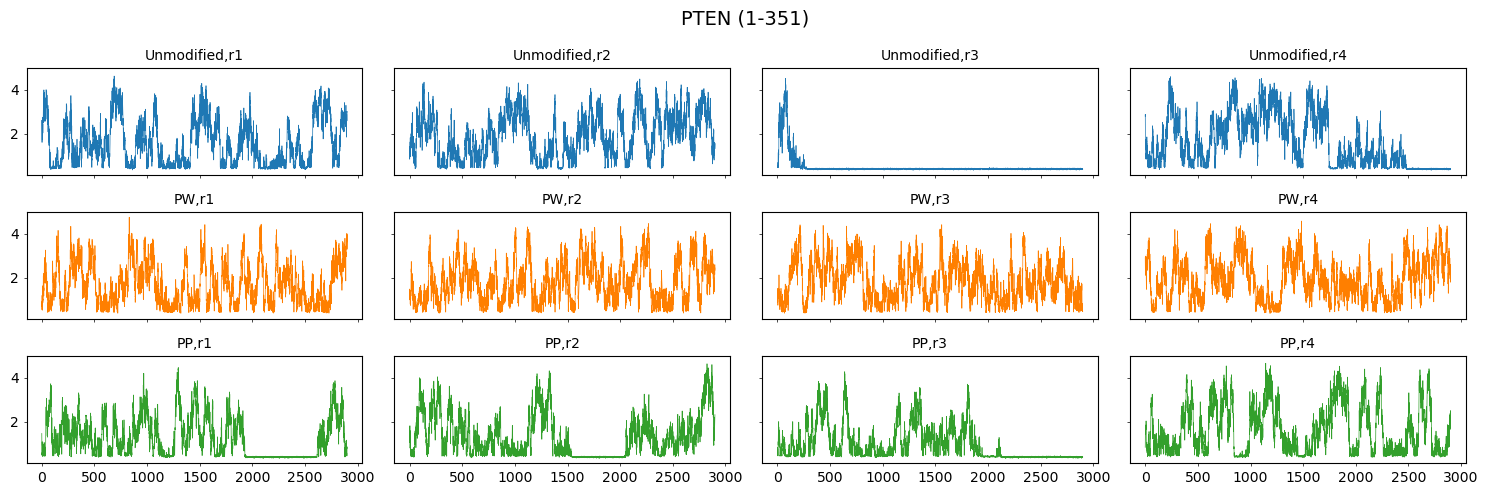

In [37]:
fig, axes = plt.subplots(3, len(replica), figsize=(15, 5), sharex=True, sharey=True)


time = [i * 0.5 for i in range(0, 5801)]

for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=10, width=0.5, length=2)
    ax.tick_params(axis='both', which='minor', labelsize=10, width=0.5, length=2)


for k in range(3):
    for n in range(len(replica)):
        i = replica[n]
        replica_label = 'r{}'.format(i)
        method_label = ''
        color = colors[k]
        
        if k == 0:
            dist = np.genfromtxt('mindist/PTEN/Unmodified/rep%s/mindist_PTEN_Unmodified_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'Unmodified'
        elif k == 1:
            dist = np.genfromtxt('mindist/PTEN/PW/rep%s/mindist_PTEN_PW_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PW'
        elif k == 2:
            dist = np.genfromtxt('mindist/PTEN/PP/rep%s/mindist_PTEN_PP_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PP'
            
        
        sns.lineplot(ax=axes[k,n], x=time, y=dist, linewidth=0.5, color=color, label=method_label, legend=False)
        axes[k, n].set_title('{},{}'.format(method_label, replica_label), fontsize=10)
        
fig.suptitle('PTEN (1-351)', fontsize=14)
plt.tight_layout()
fig.savefig('pten_mindist.pdf', bbox_inches = 'tight')

# Talin's FERM

Binding percentage in Unmodified r1 is: 29.6%
Binding percentage in Unmodified r2 is: 53.8%
Binding percentage in Unmodified r3 is: 76.0%
Binding percentage in Unmodified r4 is: 46.3%
Binding percentage in PW r1 is: 28.5%
Binding percentage in PW r2 is: 26.2%
Binding percentage in PW r3 is: 29.0%
Binding percentage in PW r4 is: 56.2%
Binding percentage in PP r1 is: 57.2%
Binding percentage in PP r2 is: 43.1%
Binding percentage in PP r3 is: 71.9%
Binding percentage in PP r4 is: 43.8%


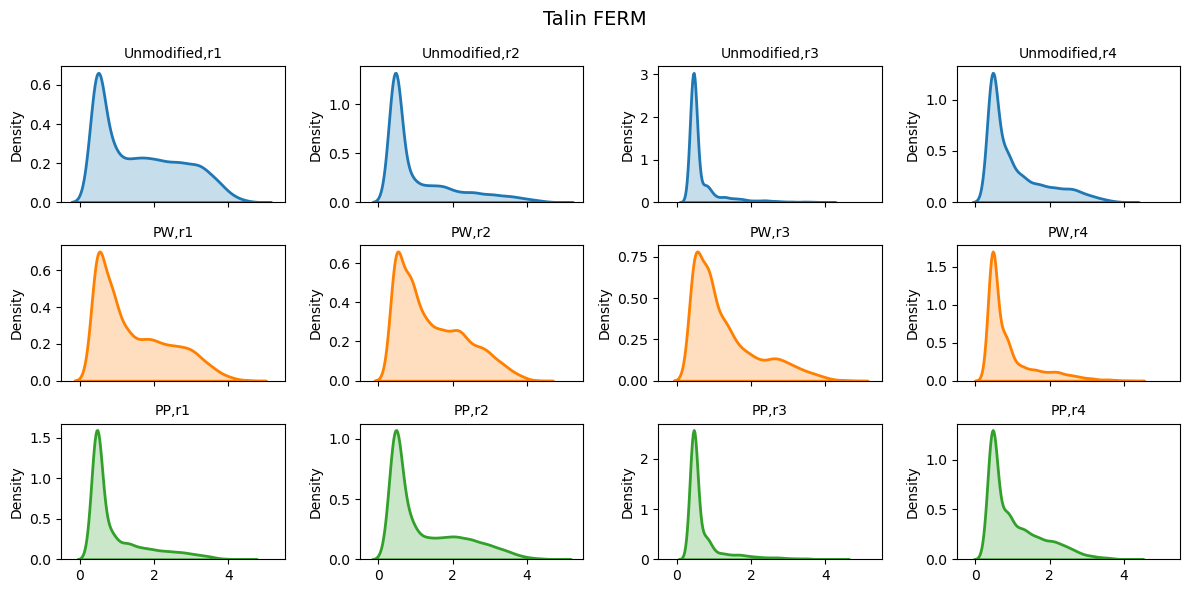

In [38]:
replica=[1,2,3,4]

ferm = []
ferm_m3pp = []
ferm_m3pw = []

fig, axes = plt.subplots(3, len(replica), figsize=(12, 6), sharex=True)

for k in range(3):
    for n in range(len(replica)):
        i = replica[n]
        replica_label = 'r{}'.format(i)
        method_label = ''
        color = colors[k]
        
        if k == 0:
            dist_ferm = np.genfromtxt('mindist/FERM/Unmodified/rep%s/mindist_FERM_Unmodified_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'Unmodified'
        elif k == 1:
            dist_ferm = np.genfromtxt('mindist/FERM/PW/rep%s/mindist_FERM_PW_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PW'
        elif k == 2:
            dist_ferm = np.genfromtxt('mindist/FERM/PP/rep%s/mindist_FERM_PP_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PP'
            
        kde_plot = sns.kdeplot(ax=axes[k,n], data = dist_ferm.squeeze(), fill=True, linewidth=2.0, color = color)
        x, y = kde_plot.collections[0].get_paths()[0].vertices.T
        cutoff = 0.7  
        area = np.trapz(y[x <= cutoff], x[x <= cutoff])
        abs_area = np.abs(area)*100 
        print("Binding percentage in {} {} is: {:.1f}%".format(method_label, replica_label, abs_area))
        
        if k == 0:
            ferm.append(abs_area)
        elif k == 1:
            ferm_m3pw.append(abs_area)
        elif k == 2:
            ferm_m3pp.append(abs_area)
        axes[k, n].set_title('{},{}'.format(method_label, replica_label), fontsize=10)

fig.suptitle('Talin FERM', fontsize=14) 
plt.tight_layout()

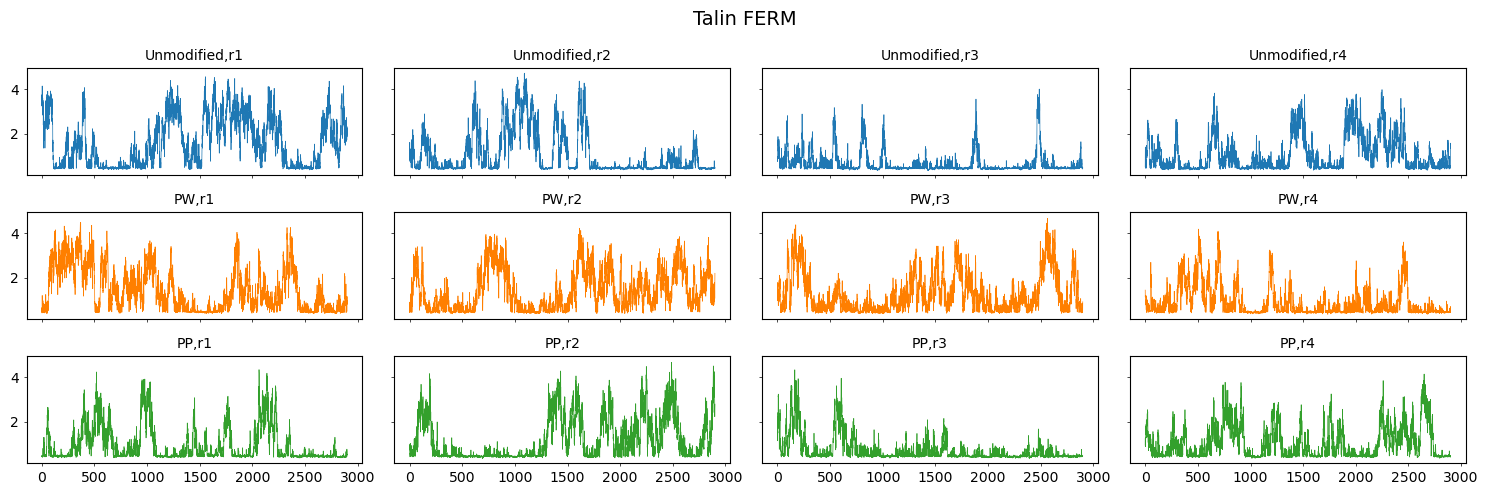

In [39]:
fig, axes = plt.subplots(3, len(replica), figsize=(15, 5), sharex=True, sharey=True)


time = [i * 0.5 for i in range(0, 5801)]

for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=10, width=0.5, length=2)
    ax.tick_params(axis='both', which='minor', labelsize=10, width=0.5, length=2)


for k in range(3):
    for n in range(len(replica)):
        i = replica[n]
        replica_label = 'r{}'.format(i)
        method_label = ''
        color = colors[k]
        
        if k == 0:
            dist =  np.genfromtxt('mindist/FERM/Unmodified/rep%s/mindist_FERM_Unmodified_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'Unmodified'
        elif k == 1:
            dist =  np.genfromtxt('mindist/FERM/PW/rep%s/mindist_FERM_PW_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PW'
        elif k == 2:
            dist =  np.genfromtxt('mindist/FERM/PP/rep%s/mindist_FERM_PP_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PP'
            
        
        sns.lineplot(ax=axes[k,n], x=time, y=dist, linewidth=0.5, color=color, label=method_label, legend=False)
        axes[k, n].set_title('{},{}'.format(method_label, replica_label), fontsize=10)
        
fig.suptitle('Talin FERM', fontsize=14)
plt.tight_layout()
fig.savefig('ferm_mindist.pdf', bbox_inches = 'tight')

# Complexin CTD

Binding percentage in Unmodified r1 is: 100.0%
Binding percentage in Unmodified r2 is: 100.0%
Binding percentage in Unmodified r3 is: 100.0%
Binding percentage in Unmodified r4 is: 100.0%
Binding percentage in PW r1 is: 86.0%
Binding percentage in PW r2 is: 59.4%
Binding percentage in PW r3 is: 79.8%
Binding percentage in PW r4 is: 81.1%
Binding percentage in PP r1 is: 100.0%
Binding percentage in PP r2 is: 100.0%
Binding percentage in PP r3 is: 100.0%
Binding percentage in PP r4 is: 100.0%


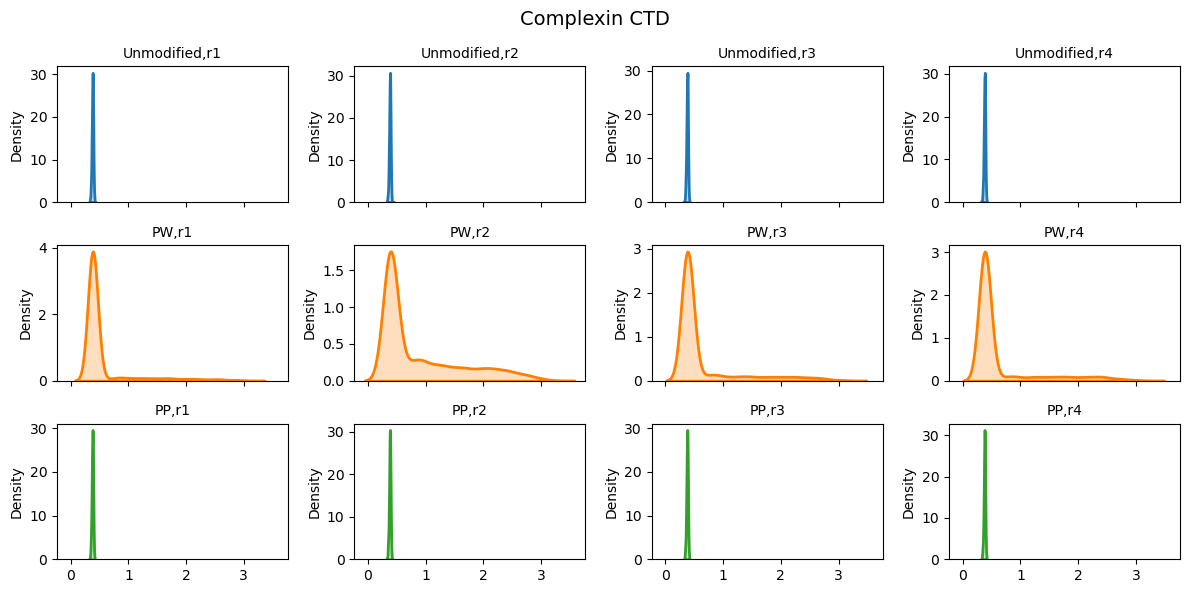

In [40]:
replica=[1,2,3,4]

ctd = []
ctd_m3pp = []
ctd_m3pw = []

fig, axes = plt.subplots(3, len(replica), figsize=(12, 6), sharex=True)

for k in range(3):
    for n in range(len(replica)):
        i = replica[n]
        replica_label = 'r{}'.format(i)
        method_label = ''
        color = colors[k]
        
        if k == 0:
            dist_ctd = np.genfromtxt('mindist/Complexin/Unmodified/rep%s/mindist_Complexin_Unmodified_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'Unmodified'
        elif k == 1:
            dist_ctd = np.genfromtxt('mindist/Complexin/PW/rep%s/mindist_Complexin_PW_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PW'
        elif k == 2:
            dist_ctd = np.genfromtxt('mindist/Complexin/PP/rep%s/mindist_Complexin_PP_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PP'
             
        kde_plot = sns.kdeplot(ax=axes[k,n], data = dist_ctd.squeeze(), fill=True, linewidth=2.0, color = color)
        x, y = kde_plot.collections[0].get_paths()[0].vertices.T
        cutoff = 0.7  
        area = np.trapz(y[x <= cutoff], x[x <= cutoff])
        abs_area = np.abs(area)*100 
        print("Binding percentage in {} {} is: {:.1f}%".format(method_label, replica_label, abs_area))
        
        if k == 0:
            ctd.append(abs_area)
        elif k == 1:
            ctd_m3pw.append(abs_area)
        elif k == 2:
            ctd_m3pp.append(abs_area)
        axes[k, n].set_title('{},{}'.format(method_label, replica_label), fontsize=10)

fig.suptitle('Complexin CTD', fontsize=14)             
plt.tight_layout()

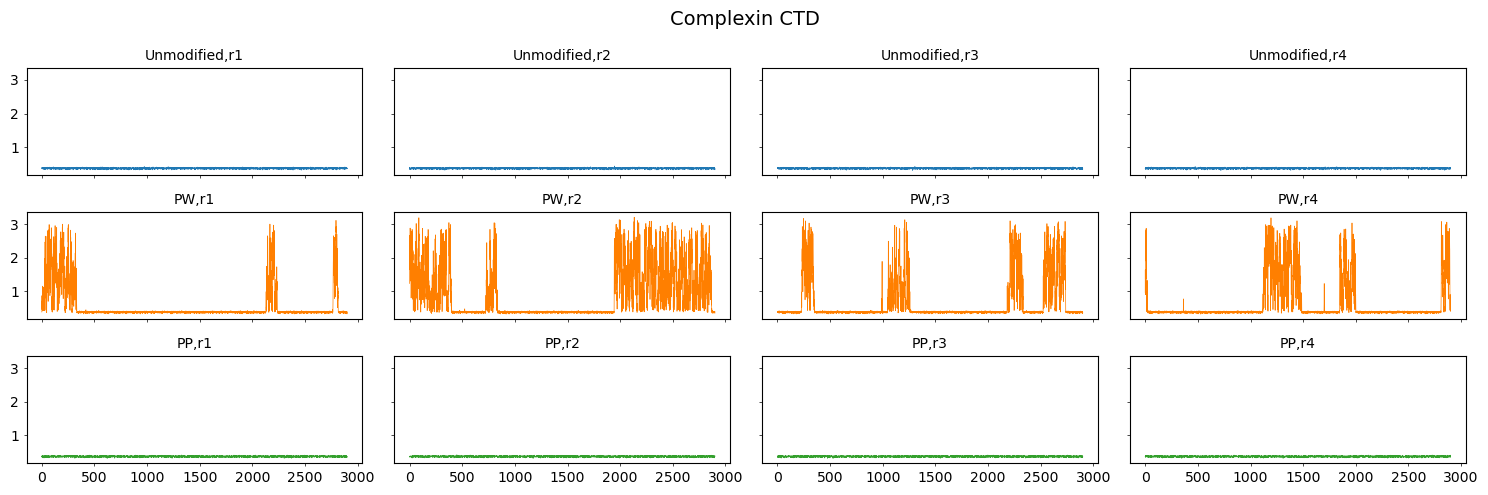

In [41]:
fig, axes = plt.subplots(3, len(replica), figsize=(15, 5), sharex=True, sharey=True)


time = [i * 0.5 for i in range(0, 5801)]

for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=10, width=0.5, length=2)
    ax.tick_params(axis='both', which='minor', labelsize=10, width=0.5, length=2)


for k in range(3):
    for n in range(len(replica)):
        i = replica[n]
        replica_label = 'r{}'.format(i)
        method_label = ''
        color = colors[k]
        
        if k == 0:
            dist = np.genfromtxt('mindist/Complexin/Unmodified/rep%s/mindist_Complexin_Unmodified_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'Unmodified'
        elif k == 1:
            dist = np.genfromtxt('mindist/Complexin/PW/rep%s/mindist_Complexin_PW_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PW'
        elif k == 2:
            dist = np.genfromtxt('mindist/Complexin/PP/rep%s/mindist_Complexin_PP_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PP'
            
        
        sns.lineplot(ax=axes[k,n], x=time, y=dist, linewidth=0.5, color=color, label=method_label, legend=False)
        axes[k, n].set_title('{},{}'.format(method_label, replica_label), fontsize=10)
        
fig.suptitle('Complexin CTD', fontsize=14)
plt.tight_layout()
fig.savefig('ctd_mindist.pdf', bbox_inches = 'tight')

# TRPV4 IDR

Binding percentage in Unmodified r1 is: 36.3%
Binding percentage in Unmodified r2 is: 68.2%
Binding percentage in Unmodified r3 is: 57.7%
Binding percentage in Unmodified r4 is: 98.4%
Binding percentage in PW r1 is: 16.5%
Binding percentage in PW r2 is: 28.7%
Binding percentage in PW r3 is: 29.5%
Binding percentage in PW r4 is: 14.0%
Binding percentage in PP r1 is: 92.5%
Binding percentage in PP r2 is: 99.8%
Binding percentage in PP r3 is: 99.7%
Binding percentage in PP r4 is: 64.5%


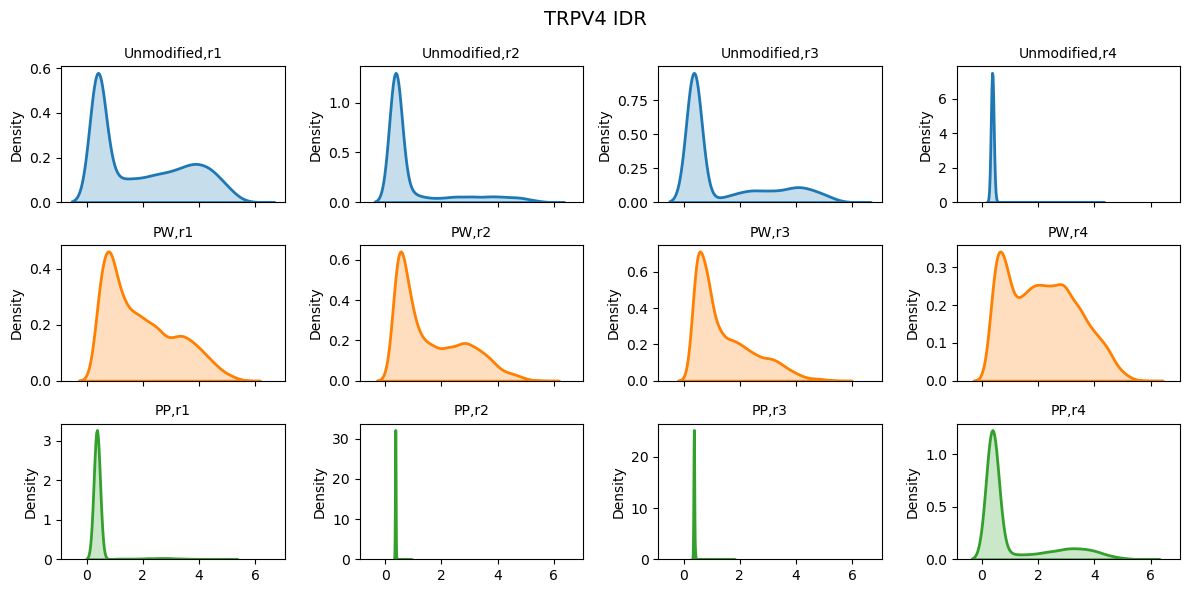

In [43]:

replica=[1,2,3,4]

idr = []
idr_m3pw = []
idr_m3pp = []


fig, axes = plt.subplots(3, len(replica), figsize=(12, 6), sharex=True)

for k in range(3):
    for n in range(len(replica)):
        i = replica[n]
        replica_label = 'r{}'.format(i)
        method_label = ''
        color = colors[k]
        if k == 0:
            dist_idr = np.genfromtxt('mindist/TRPV4/Unmodified/rep%s/mindist_TRPV4_Unmodified_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'Unmodified'
        elif k == 1:
            dist_idr = np.genfromtxt('mindist/TRPV4/PW/rep%s/mindist_TRPV4_PW_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PW'
        elif k == 2:
            dist_idr = np.genfromtxt('mindist/TRPV4/PP/rep%s/mindist_TRPV4_PP_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PP'
            
        kde_plot = sns.kdeplot(ax=axes[k,n], data = dist_idr.squeeze(), fill=True, linewidth=2.0, color=color)
        x, y = kde_plot.collections[0].get_paths()[0].vertices.T
        cutoff = 0.7  
        area = np.trapz(y[x <= cutoff], x[x <= cutoff])
        abs_area = np.abs(area)*100 
        print("Binding percentage in {} {} is: {:.1f}%".format(method_label, replica_label, abs_area))
        
        if k == 0:
            idr.append(abs_area)
        elif k == 1:
            idr_m3pw.append(abs_area)
        elif k == 2:
            idr_m3pp.append(abs_area)
        axes[k, n].set_title('{},{}'.format(method_label, replica_label), fontsize=10)
            
fig.suptitle('TRPV4 IDR', fontsize=14)        
plt.tight_layout()

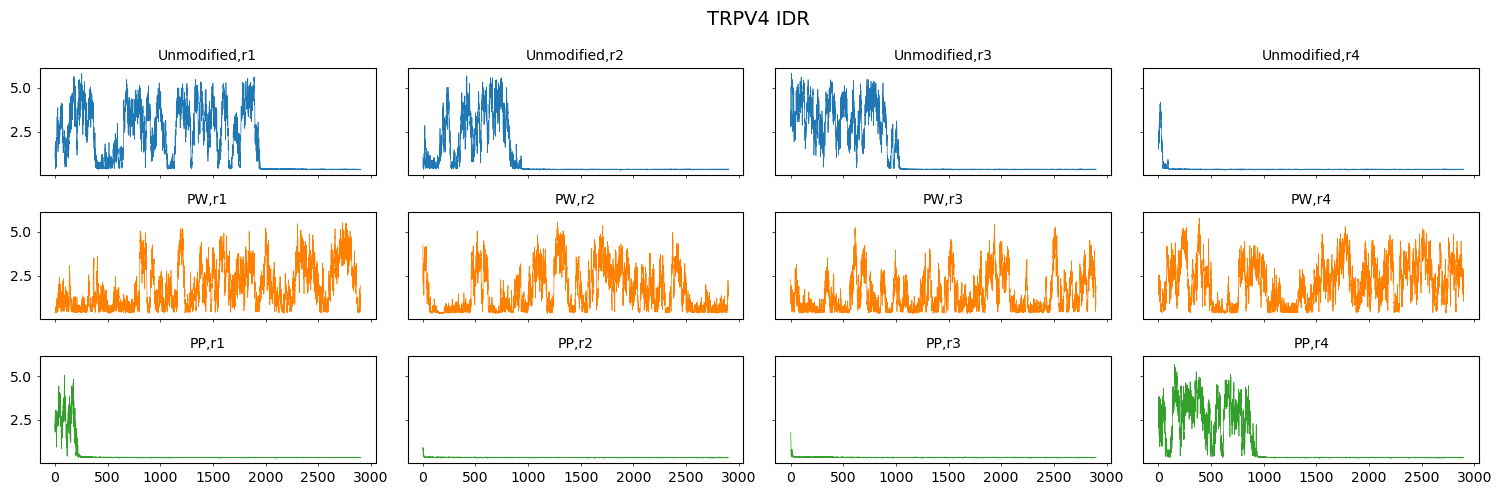

In [44]:
fig, axes = plt.subplots(3, len(replica), figsize=(15, 5), sharex=True, sharey=True)


time = [i * 0.5 for i in range(0, 5801)]

for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=10, width=0.5, length=2)
    ax.tick_params(axis='both', which='minor', labelsize=10, width=0.5, length=2)


for k in range(3):
    for n in range(len(replica)):
        i = replica[n]
        replica_label = 'r{}'.format(i)
        method_label = ''
        color = colors[k]
        
        if k == 0:
            dist = np.genfromtxt('mindist/TRPV4/Unmodified/rep%s/mindist_TRPV4_Unmodified_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'Unmodified'
        elif k == 1:
            dist = np.genfromtxt('mindist/TRPV4/PW/rep%s/mindist_TRPV4_PW_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PW'
        elif k == 2:
            dist = np.genfromtxt('mindist/TRPV4/PP/rep%s/mindist_TRPV4_PP_rep%s_column2.csv' % (str(i), str(i)), unpack=True)
            method_label = 'PP'
            
        
        sns.lineplot(ax=axes[k,n], x=time, y=dist, linewidth=0.5, color=color, label=method_label, legend=False)
        axes[k, n].set_title('{},{}'.format(method_label, replica_label), fontsize=10)
        
fig.suptitle('TRPV4 IDR', fontsize=14)
plt.tight_layout()
fig.savefig('trpv4_idr_mindist.pdf', bbox_inches = 'tight')

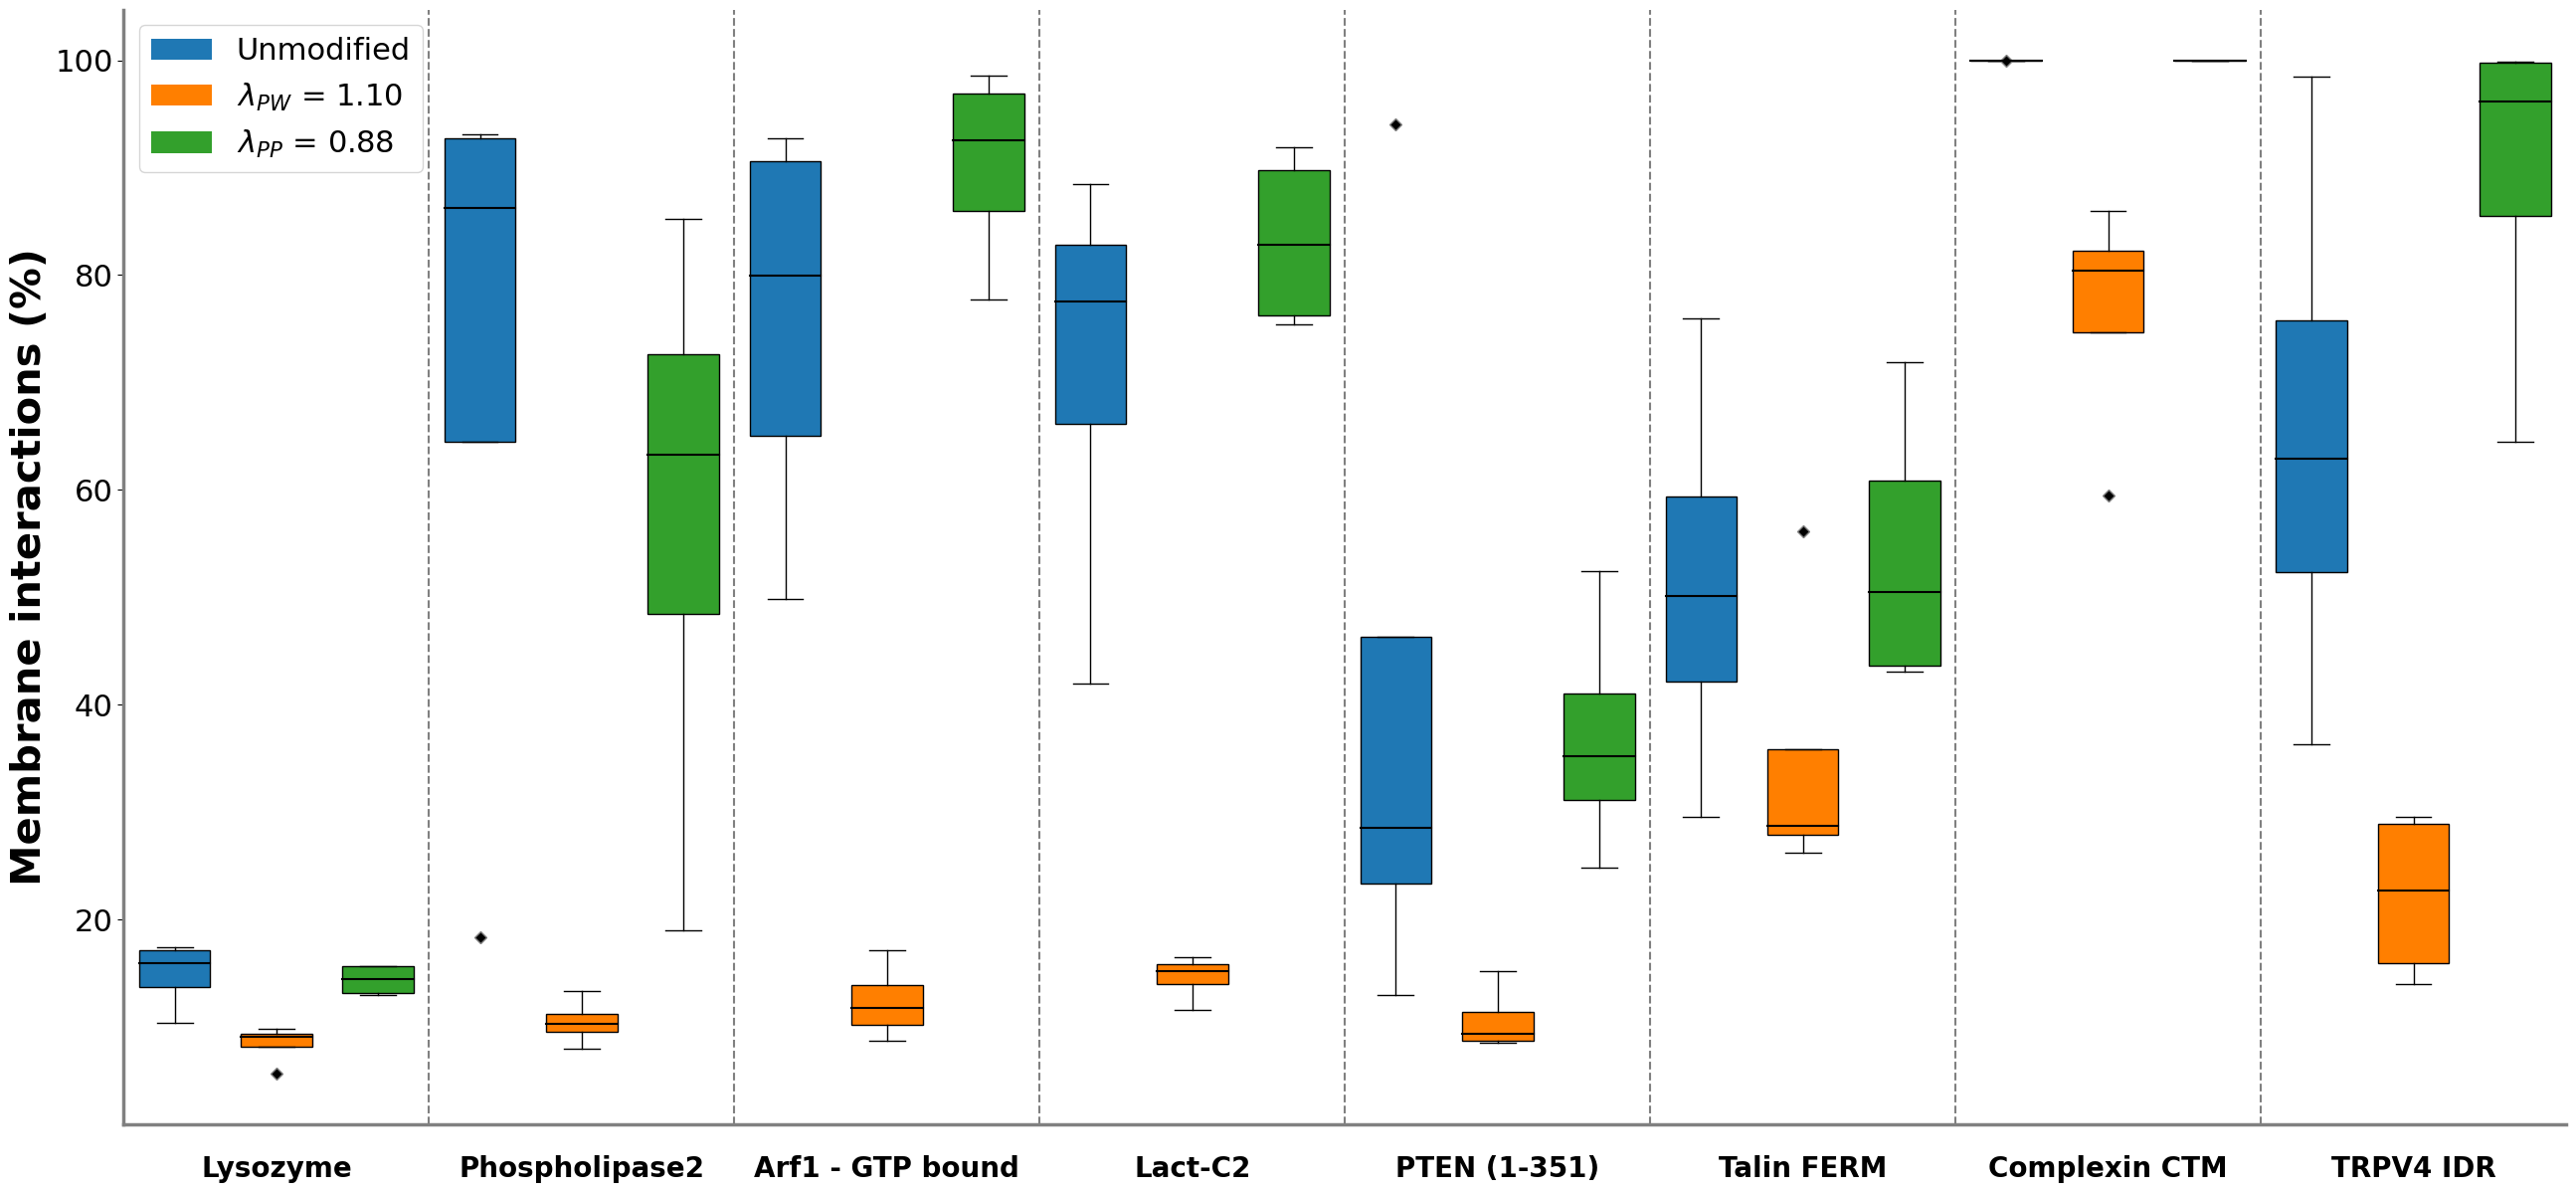

In [45]:
proteins = ['Lysozyme', 'Phospholipase2', 'Arf1 - GTP bound', 'Lact-C2', 'PTEN (1-351)', 'Talin FERM', 'Complexin CTM', 'TRPV4 IDR']
list1_data = [lys, pla, arf, lact, pten1to351, ferm, ctd, idr]
list2_data = [lys_m3pw, pla_m3pw, arf_m3pw, lact_m3pw, pten1to351_m3pw, ferm_m3pw, ctd_m3pw, idr_m3pw]
list3_data = [lys_m3pp, pla_m3pp, arf_m3pp, lact_m3pp, pten1to351_m3pp, ferm_m3pp, ctd_m3pp, idr_m3pp]


fig, ax = plt.subplots(figsize=(26, 12))

colors = ['#1F78B4', '#FF7F00', '#33A02C']
medianprops = dict(color="black",linewidth=1.5)

for i in range(len(proteins)):
    protein_data = [list1_data[i], list2_data[i], list3_data[i]]
    
    bp = ax.boxplot(protein_data, positions=[i * 3 + 1, i * 3 + 2, i * 3 + 3], 
                    widths=0.7, patch_artist=True, medianprops=medianprops, flierprops={'marker': 'D', 'markerfacecolor': 'black', 'markeredgecolor': 'gray'})
    
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_xticks([])  
    ax.tick_params(left=True, labelsize = 22, length = 4)
    ax.text((i * 3 + 2), -4, proteins[i], rotation=0, ha='center', fontsize=20, fontweight='bold')
    ax.set_ylabel('Membrane interactions (%)', fontsize = 30, fontweight='bold')
    
    if i < len(proteins) - 1:
        ax.axvline((i + 1) * 3 + 0.5, color='gray', linestyle='--')

legend_labels = ['Unmodified', '$\u03BB_{PW}$ = 1.10', '$\u03BB_{PP}$ = 0.88']
legend_handles = [plt.Rectangle((0,0),1,1,fc=color) for color in colors]
ax.legend(legend_handles, legend_labels, loc='upper left', fontsize = 22)

ax.spines['left'].set_linewidth(2.5)  
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('gray') 
ax.spines['bottom'].set_color('gray')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

plt.show()

fig.savefig("protein_membrane_binding_percent.pdf", dpi=400, bbox_inches = 'tight')

# TRPV4 IDR in solution, radius of gyration (Rg)

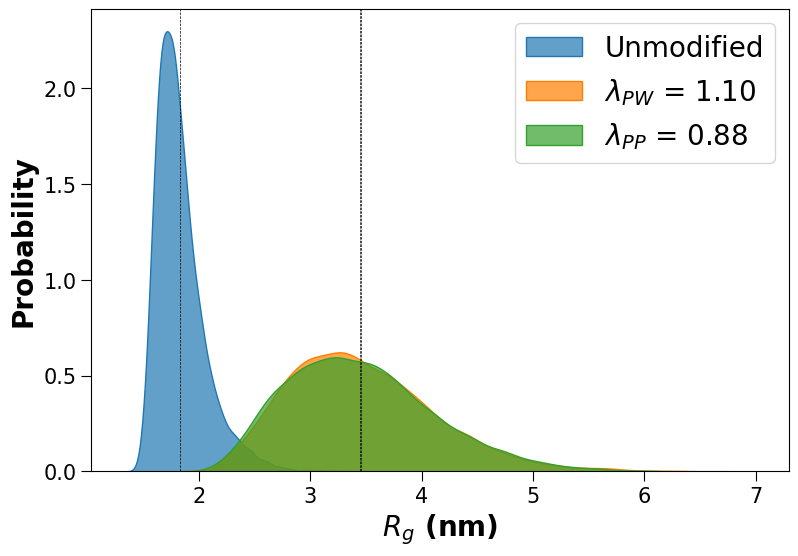

In [46]:
fig, ax = plt.subplots(figsize=(9, 6))
Rg_m3 = np.genfromtxt('Rgyr/TRPV4/Unmodified/Unmodified_rg.xvg', usecols=(1), skip_header=127, unpack=True)
Rg_pw = np.genfromtxt('Rgyr/TRPV4/PW/PW_rg.xvg', usecols=(1), skip_header=127, unpack=True)
Rg_pp = np.genfromtxt('Rgyr/TRPV4/PP/PP_rg.xvg', usecols=(1), skip_header=127, unpack=True)
plt.rcParams['axes.prop_cycle'].by_key()['color']
#fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(data = Rg_m3.squeeze(), fill=True, linewidth=1.0, color = '#1F78B4', alpha = 0.7, label = 'Unmodified')
sns.kdeplot(data = Rg_pw.squeeze(), fill=True, linewidth=1.0, color = '#FF7F00', alpha = 0.7, label = '$\u03BB_{PW}$ = 1.10')
sns.kdeplot(data = Rg_pp.squeeze(), fill=True, linewidth=1.0, color = '#33A02C', alpha = 0.7, label = '$\u03BB_{PP}$ = 0.88')

plt.axvline(np.average(Rg_m3),linewidth=0.5, linestyle='--', alpha=1, color='black')
plt.axvline(np.average(Rg_pw),linewidth=0.5, linestyle='--', alpha=1, color='black')
plt.axvline(np.average(Rg_pp),linewidth=0.5, linestyle='--', alpha=1, color='black')

plt.legend(fontsize=20)
plt.xlabel('$\it{R}$$_g$ (nm)', fontsize=20, fontweight = 'bold')
plt.ylabel('Probability', fontsize=20, fontweight = 'bold')
plt.tick_params(bottom=True, left=True, labelsize = 15, length = 7)
fig.savefig("Rg_trpv4_idr.pdf", bbox_inches = 'tight')



# Complexin CTD in solution, radius of gyration (Rg)

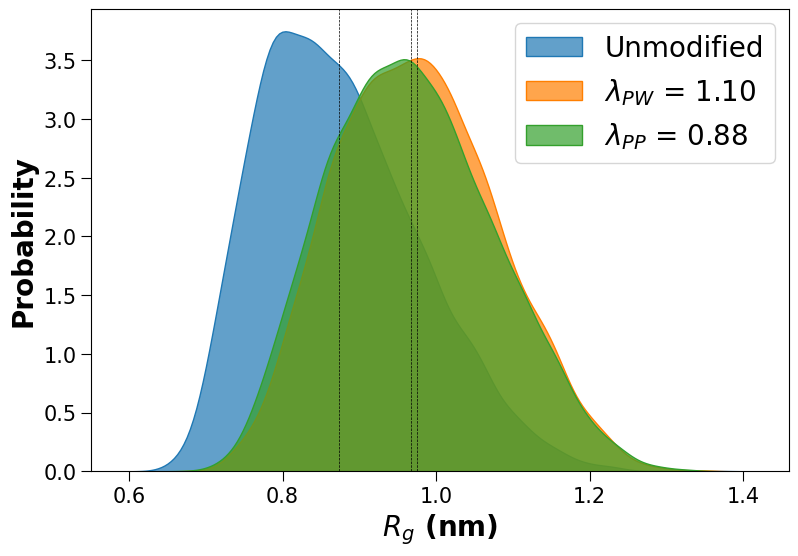

In [47]:
fig, ax = plt.subplots(figsize=(9, 6))
Rg_m3 = np.genfromtxt('Rgyr/Complexin/Unmodified/Unmodified_rg.xvg', usecols=(1), skip_header=127, unpack=True)
Rg_pw = np.genfromtxt('Rgyr/Complexin/PW/PW_rg.xvg', usecols=(1), skip_header=127, unpack=True)
Rg_pp = np.genfromtxt('Rgyr/Complexin/PP/PP_rg.xvg', usecols=(1), skip_header=127, unpack=True)
#fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(data = Rg_m3.squeeze(), fill=True, linewidth=1.0, color = '#1F78B4', alpha = 0.7, label = 'Unmodified')
sns.kdeplot(data = Rg_pw.squeeze(), fill=True, linewidth=1.0, color = '#FF7F00', alpha = 0.7, label = '$\u03BB_{PW}$ = 1.10')
sns.kdeplot(data = Rg_pp.squeeze(), fill=True, linewidth=1.0, color = '#33A02C', alpha = 0.7, label = '$\u03BB_{PP}$ = 0.88')


plt.axvline(np.average(Rg_m3),linewidth=0.5, linestyle='--', alpha=1, color='black')
plt.axvline(np.average(Rg_pw),linewidth=0.5, linestyle='--', alpha=1, color='black')
plt.axvline(np.average(Rg_pp),linewidth=0.5, linestyle='--', alpha=1, color='black')

plt.legend(fontsize=20)
plt.xlabel('$\it{R}$$_g$ (nm)', fontsize=20, fontweight = 'bold')
plt.ylabel('Probability', fontsize=20, fontweight = 'bold')
plt.tick_params(bottom=True, left=True, labelsize = 15, length = 7)
fig.savefig("Rg_complexin_ctd.pdf", bbox_inches = 'tight')